In [13]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression

In [28]:
#Data Familarization

#read the data
pn=pd.read_csv('labels.csv')
pn

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [29]:
val=pd.read_csv("values.csv")
val
data=pd.merge(pn,val)
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [48]:

data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,0.866667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,0.971091,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [51]:
data.shape

(180, 15)

In [52]:
data.shape

(180, 15)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [54]:
#1.Data Cleaning
null_values=data.isna().sum()
null_values

patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [55]:
data['thal'].value_counts().sort_values(ascending=False)
data['thal'].replace({'normal':0, 'fixed_defect':1, 'reversible_defect':2},inplace=True)
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,0,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,0,124,3,2,1,0,255,0.0,1,48,175,0


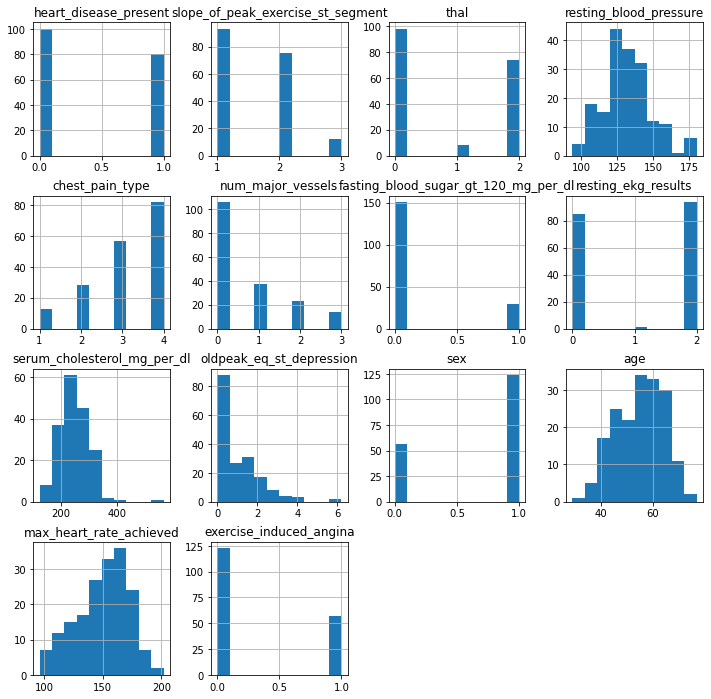

In [56]:
data.hist(figsize = (12, 12))
plt.show()

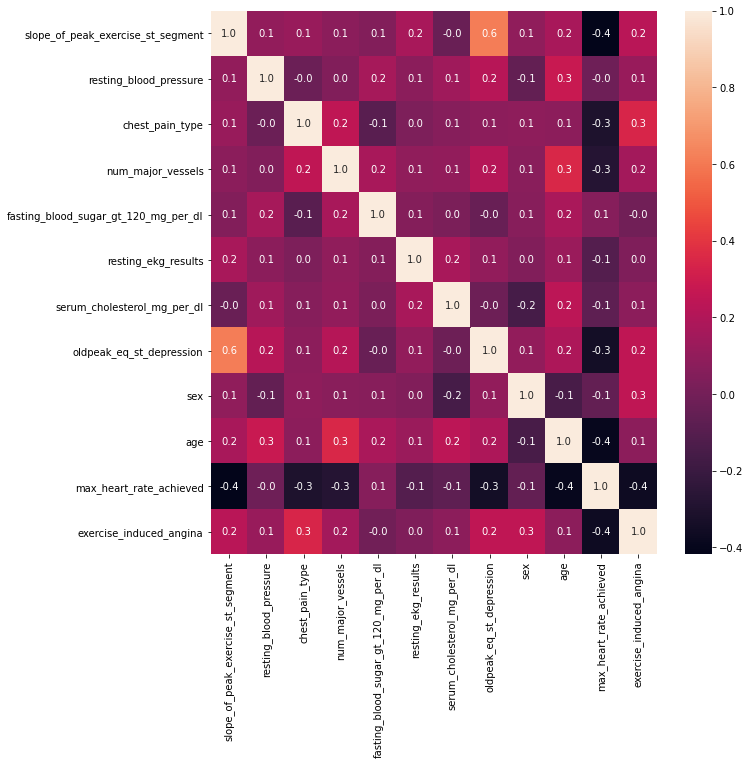

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(val.corr(),annot=True,fmt='.1f')
plt.show()

(array([ 1.,  5., 17., 25., 22., 34., 33., 30., 11.,  2.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

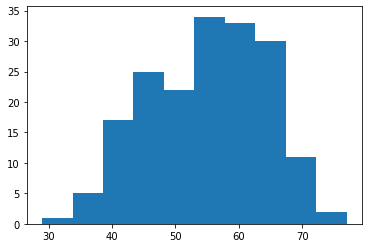

In [23]:
plt.hist(val["age"], bins=10)

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

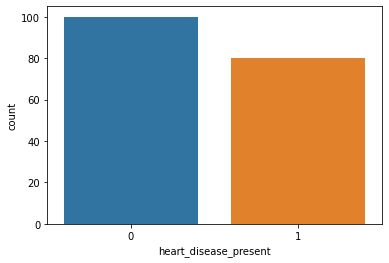

In [59]:
#Visual Exploratory Data Analysis (EDA)
sns.countplot(x='heart_disease_present', data=data)

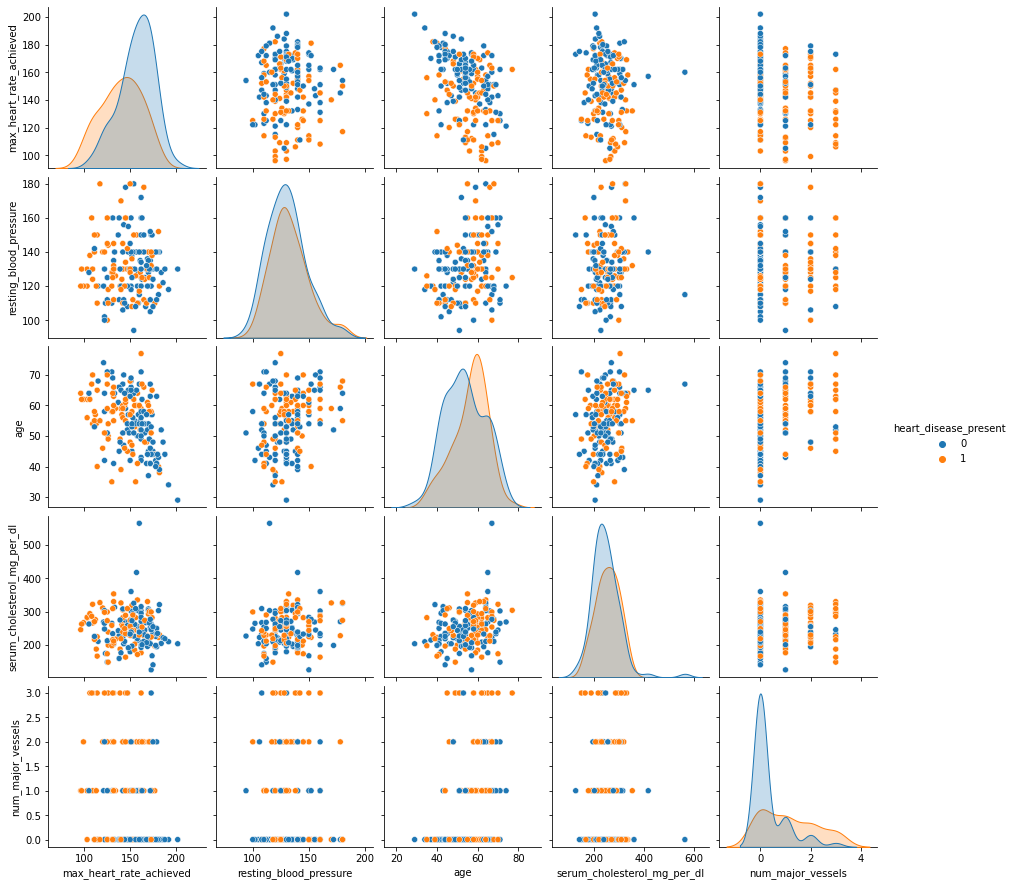

In [64]:
sns.pairplot(data, x_vars=["max_heart_rate_achieved","resting_blood_pressure","age","serum_cholesterol_mg_per_dl","num_major_vessels"],
    y_vars=["max_heart_rate_achieved","resting_blood_pressure","age","serum_cholesterol_mg_per_dl","num_major_vessels"],hue="heart_disease_present")

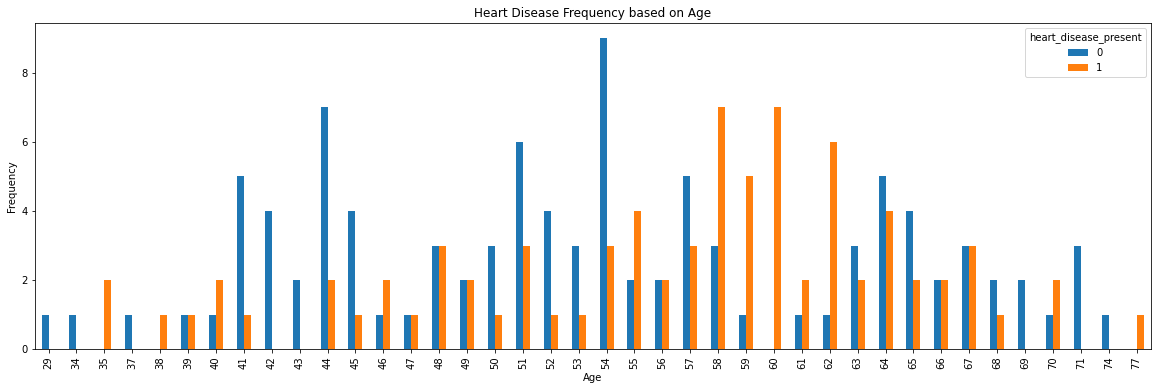

In [70]:
pd.crosstab(data.age,data.heart_disease_present).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

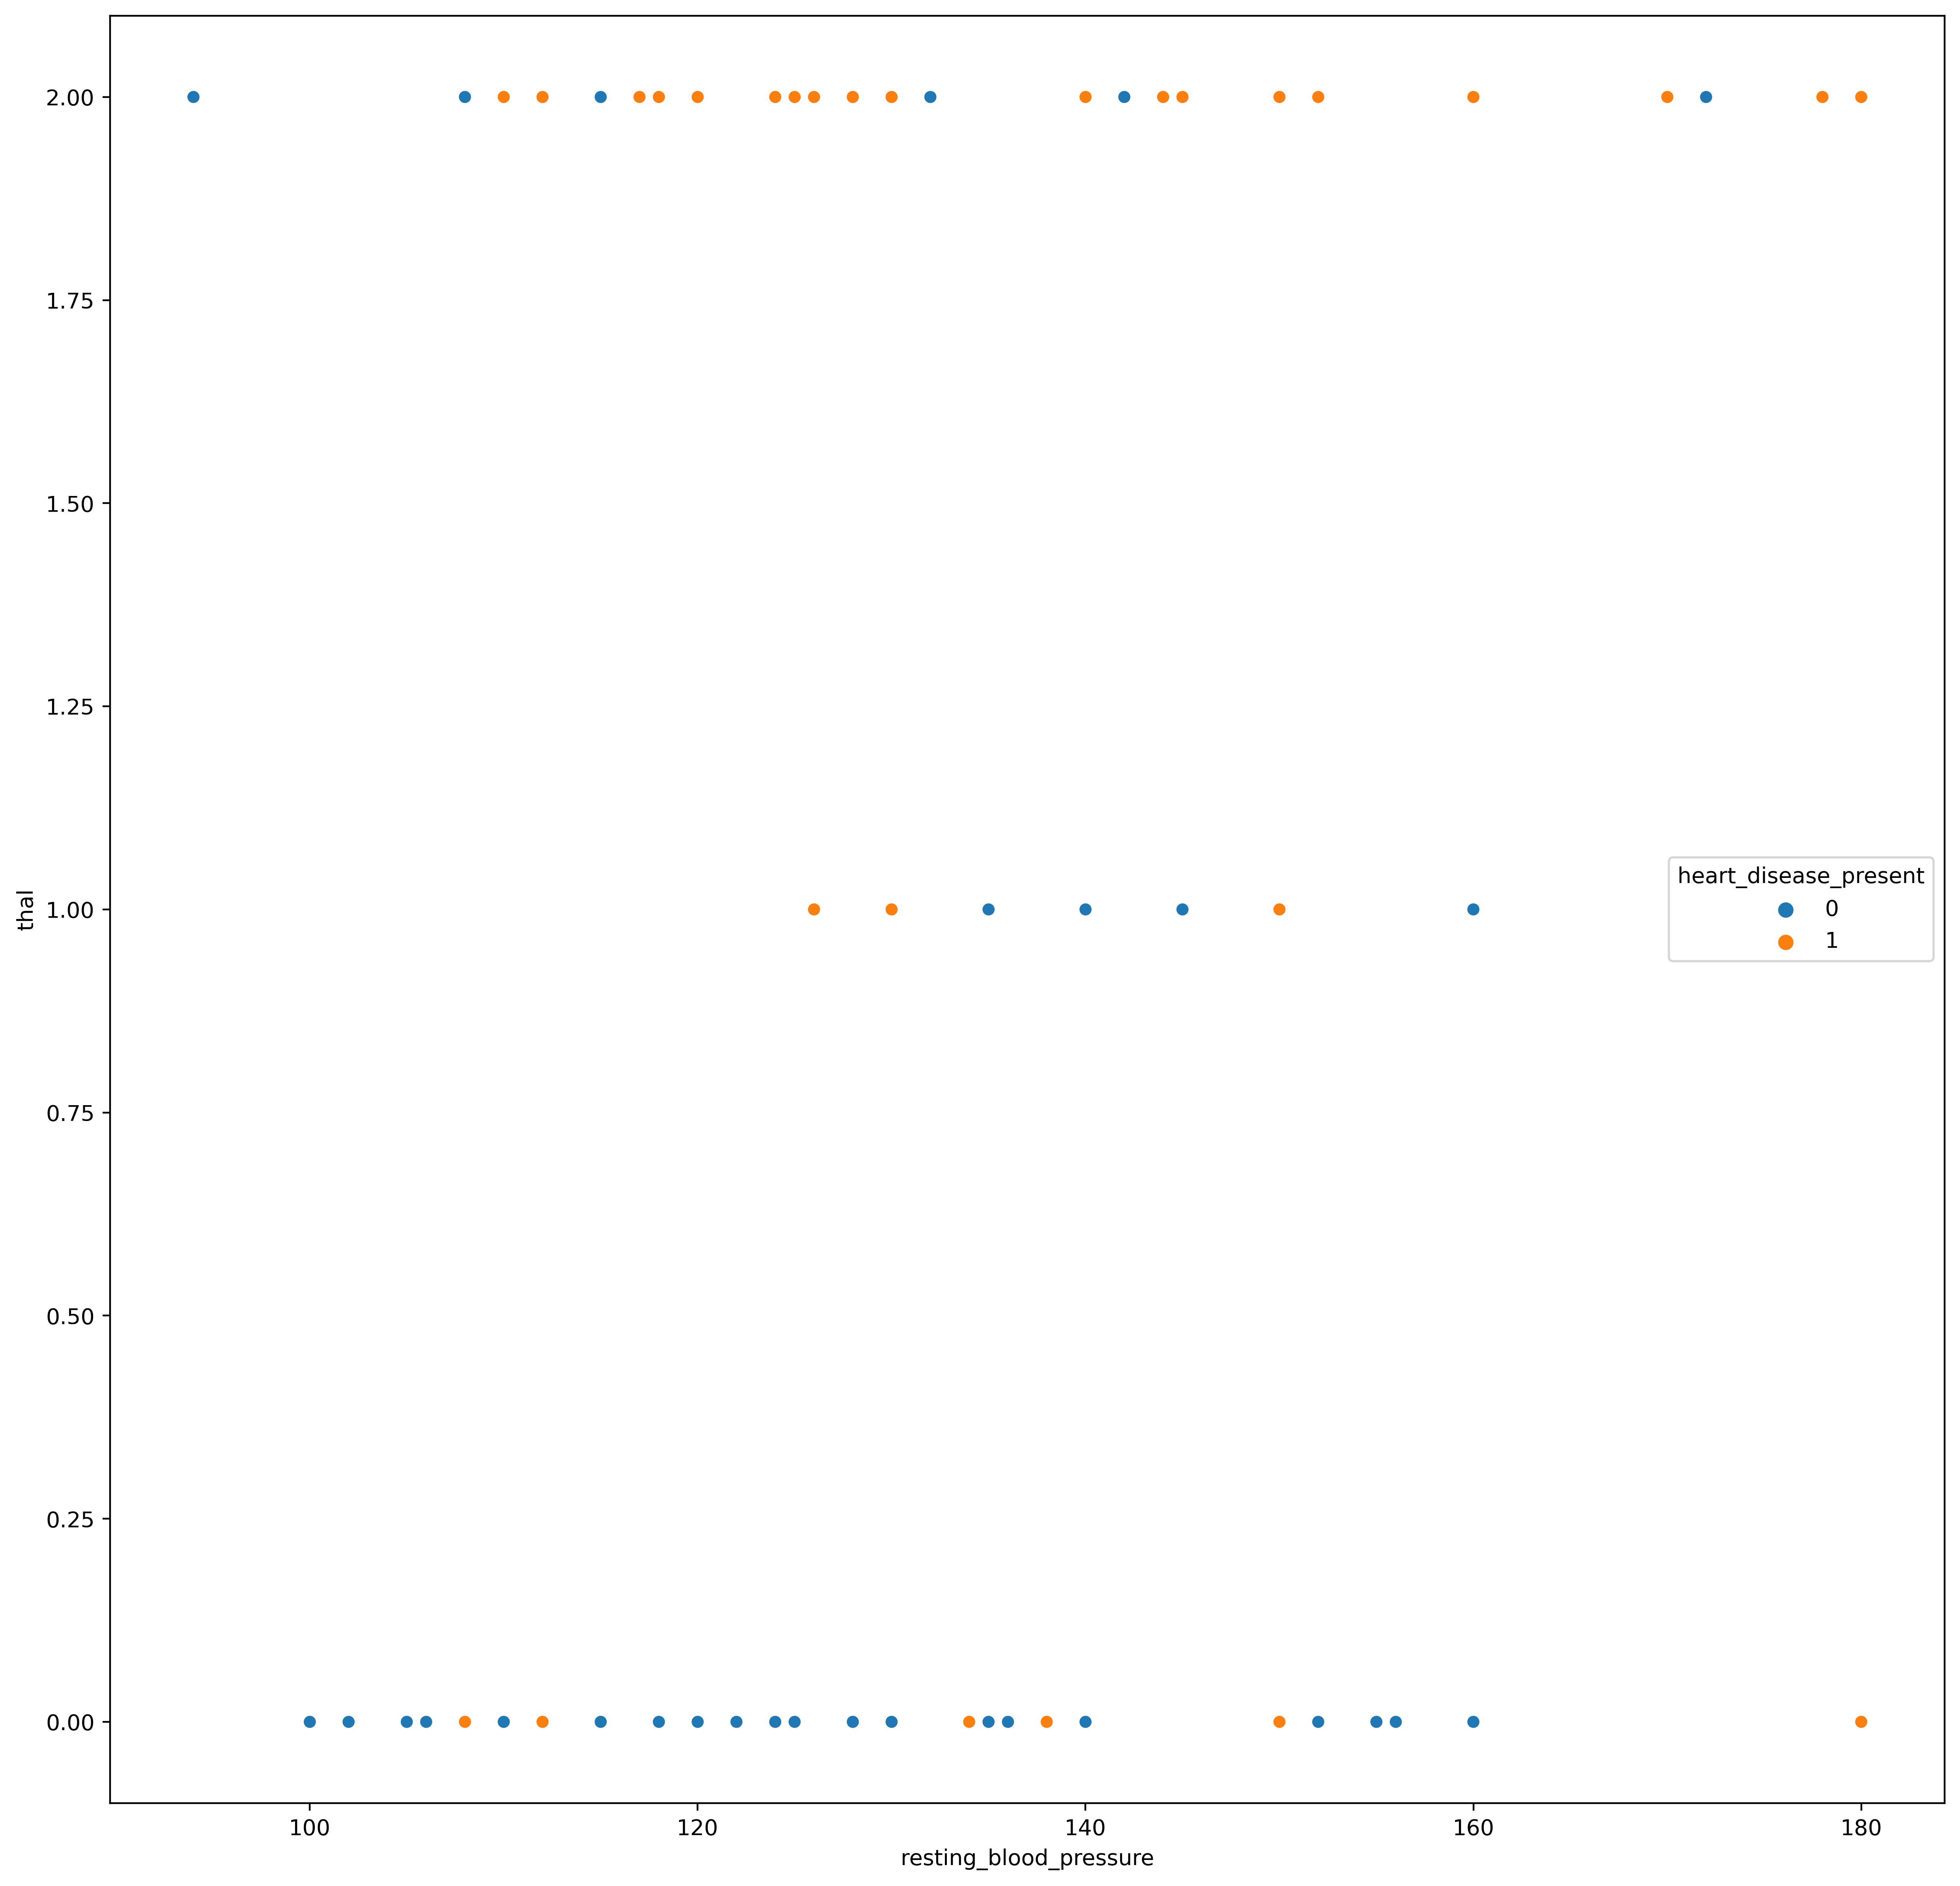

In [77]:
plt.figure(figsize=(15,15),dpi=400)
ax = sns.scatterplot(x="resting_blood_pressure", y="thal", data=data, hue="heart_disease_present")

In [31]:
Patient_data= data.groupby(data['patient_id'])
Patient_data.mean()


,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
02cipp,0,1,140,1,2,0,0,239,1.8,0,69,151,0
08usun,0,1,120,4,0,0,0,177,0.4,1,65,140,0
0g192k,0,2,128,4,1,0,0,263,0.2,1,64,105,1
0n5fu0,0,1,180,4,0,0,0,325,0.0,0,64,154,1
0ryxtv,0,2,102,4,0,0,2,265,0.6,0,42,122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
z7xkou,1,2,150,4,3,0,2,225,1.0,0,65,114,0
z8yl4y,0,1,140,1,0,0,0,199,1.4,1,40,178,1
zaytyf,1,2,100,4,2,0,2,299,0.9,1,67,125,1
